# Analysis of Demographic and Heatlh Utilization Data

### Hypotheses

Our group set out to explore two primary hopotheses:
* Hypothesis I:  CA is experiencing increased emergency room visits due to cannabis tourism.
* Hypothesis II:  Socioeconomic deprivation drives higher emergency room utilization.

Although we discovered that there would be insufficient publicly available data on cannabis utilization, we continued to collect as much emergency room, socioeconomic and prescription drug data as we could find in the hopes that we might find other interesting relationships.

###  Data Merged in Combined Hosp Drug Util for Analysis
The following data elements were assembled for approximately 1,500 CA zip codes in the ED Visit Data Munging jupyter notebook:

* CA Office of Statewide Health Planning and Development (OSHPD)
    * Emergency Department Visits
    * Inpatient Discharges
* US Census American Community Survey
    * Population demographics
    * Employment Rates
    * Median Household Income
    * Insured Rates
* Area Deprivation Index (Socioeconomic Measure)
* ESRI Tapestry Consumer Segmentation Data
* CA Controlled Substance Utilization Review and Evaluation System (CURES)
    * Opioid Prescription Volumes
    * Number of Unique Patients with Opioid Prescriptions
    * Schedule II – IV Controlled Substance Prescription Volumes
* US Centers for Disease Control (CDC)
    * Overall Death Counts
    * Deaths by Leading Causes of Death

###  Define Variables to Compare Using Regression Analysis
About 23 different variables were defined from the data collected, and grouped into dependent variables and independent variables, though there was some overlap.  We calculated regression coefficients and p-values for the main hypothesis variables, and many additional combinations.  Following are the main variables used to test our hypothesis:

#### Emergency Room Utilization
* Emergency Room Visits per 1,000 population by zip code
* Inpatient Admits via Emergency Room per 1,000 population by zip code

#### Prescription Drug Utilizatoin
* Opioid Rx Prescribed per 1,000 population by zip code
* Unique Patients Prescribed Opioids per 1,000 population by zip code

#### Socioeconomic Measures
* Median Household Income by zip code
* Area Deprivation Index by zip code
* Percent of Population Employed by zip code
* Percent of Population Insured by zip code

###  Plotting Regression Analysis Results
Scatter plots were created for the key variables to show results of the hypothesis testing, and some additional plots were created to show other interesting relationships.  In addition to the scatter plots, we also created heat maps to visually compare the geospatial pattern of opioid utilization and emergency room visits to the city locations of licensed cannabis retailers, as a rough proxy for cannabis utilization.  While the data on cannabis retail locations was not sufficient to compare to the other data statistically, it does make an interesting visual comparison.

#### Hypothesis I:  Cannabis Use vs. Emergency Room Utilization
We did not find publicly available data at the level of detail we needed to statistically test this hypothesis, but if you read to the end, you'll see some geospatial evidence.

#### Hypothesis II:  Socioeconomic Factors vs. Emergency Room Utilization
Median income is one of the key drivers determining whether a family has health isurance.
<img style="left;" src="Images/Median Income and Pct Insured.png" width=45%/>

Median income is a small driver of emergency room utilization, partly because people with lower income are less likely to have health insurance, so they tend to use the emergency room for primary care.
<img style="left;" src="Images/Median Income and ED Utilization.png" width=45%/>

Overall neighborhood deprivation (ADI) also has a small but significant impact on overall emergency room utilizaton for similar reasons as mentioned above.
<img style="left;" src="Images/ADI and ED Utilization.png" width=45%/>

Median income also drives higher hospital utilization via the emergency room.
<img style="left;" src="Images/Median Income and Inpatient via ED.png" width=45%/>

#### Opioid Utilization vs. Emergency Room Utilization
While this relationship was not one of the hypothesis we set out to test, it is the most significant relationship we found in the data, and may actually be somewhat related to our original hypothesis.

<img style="left;" src="Images/Opioid Use and ED utilization.png" width=45%/>

<img style="left;" src="Images/Opioid Use and Mortality Rates.png" width=45%/>

####  Back to Hypothesis I:  Cannabis Use vs. Emergency Room Utilization
The first map shows areas of high opioid utilization with the red heat map compared to the location and number of cannabis retailers as denoted by the black dots.  Notice that Los Angeles has the largest number of licensed cannabis retailers in one city (~60), but not high opioid utilization rates.  This may not be a coincidence since cannabis is increasingly considered a viable alternative to prescrition opioids to control pain, with less lethal results.

####  High Opioid Utilization vs. Cannabis Retail Locations
<img style="left;" src="Images/Opioid_Heat_vs_Cannabis_Retail_Locs.PNG" width=45%/>

The second map shows areas of high emergency room utilizaton with the red heat map compared to the location and number of cannabis retailers as denoted by the black dots.  Although cannabis may be a viable substitute for pain releif, it does not necessarily mitigate all of the issues that lead to an emergency room visit.

####  High Emergency Room Utilization vs. Cannabis Retail Locations
<img style="left;" src="Images/ED_Visits_vs_Cannabis_Retail_Locs.PNG" width=45%/>




###  Calculate Regression Statistics

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
import matplotlib.ticker as mtick
import scipy.stats as stats
import gmaps

# census key
from config import (census_key, gkey)

In [2]:
combo8_df = pd.read_csv("Combined_Hosp_Drug_Util_v3.csv")

In [3]:
# Define variables from dataframe to use in regression analysis

# Independent Variables
Pct_FT_Employed = list(combo8_df['Pct Full Time Employed'])
Median_Income = list(combo8_df['Household Median Income'])
Pct_Insured = list(combo8_df['Pct Insured'])
Tapestry_Seg = list(combo8_df['Tapestry Seg Nr'])
Lifemode = list(combo8_df['Lifemode Code'])
ADI_State = list(combo8_df['ADI State Rank'])
ADI_Natl = list(combo8_df['ADI Natl Rank'])
Pct_Male = list(combo8_df['Pct Male'])
Opioid_Rx_per_1000 = list(combo8_df['Opioid Rx per 1,000'])
Opioid_Pop_per_1000 = list(combo8_df['Pop w Opioid Rx per 1,000'])

# Dependent Variables
C2_C4_per_1000 = list(combo8_df['C2-C4 per 1,000'])
C4_per_1000 = list(combo8_df['C4 per 1,000'])
C3_per_1000 = list(combo8_df['C3 per 1,000'])
C2_per_1000 = list(combo8_df['C2 per 1,000'])
IP_via_ED_per_1000 = list(combo8_df['IP via ED per 1,000'])
IP_per_1000 = list(combo8_df['IP per 1,000'])
ED_per_1000 = list(combo8_df['ED per 1,000'])
AS_per_1000 = list(combo8_df['AS per 1,000'])
Pct_IP_from_ED = list(combo8_df['Inpatient from ED']/combo8_df['Inpatient'])
Total_Deaths_per_1000 = list(combo8_df['Total Deaths per 1,000'])
Accidental_Deaths_per_1000 = list(combo8_df['Accidental Deaths per 1,000'])
Other_Deaths_per_1000 = list(combo8_df['Other Deaths per 1,000'])
Suicide_Deaths_per_1000 = list(combo8_df['Suicide Deaths per 1,000'])

# Population Sets
#CA_DOI_Underserved_Zips = list(combo8_df[combo8_df['CA DOI Underserved Flag']=='Y'])
#CA_DOI_Normal_Zips = list(combo8_df[combo8_df['CA DOI Underserved Flag']=='N'])

In [4]:
# Test correlation coefficient and p-value
stats.pearsonr(Opioid_Rx_per_1000, Total_Deaths_per_1000)
#stats.ttest_ind(CA_DOI_Underserved_Zips, CA_DOI_Normal_Zips, equal_var=False)

(0.7974694033581787, 0.0)

###  Define coefficients and pvals for plot subtitles

In [5]:
# significant moderate to strong correlations (p<0.05)

stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)#(0.7902, 7.4e-323)
oped_coeff = '{:0.2f}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[0])
oped_pval = '{:.3e}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[1])

stats.pearsonr(Opioid_Rx_per_1000, Total_Deaths_per_1000)  #(0.7974, 0.0)
opmort_coeff = '{:0.2f}'.format(stats.pearsonr(Opioid_Rx_per_1000, Total_Deaths_per_1000)[0])
opmort_pval = '{:.3e}'.format(stats.pearsonr(Opioid_Rx_per_1000, Total_Deaths_per_1000)[1])

stats.pearsonr(Median_Income, Pct_Insured)  #(0.5419, 5.9732e-116)
incins_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, Pct_Insured)[0])
incins_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, Pct_Insured)[1])

stats.pearsonr(Median_Income, ED_per_1000)     #(-0.3363, 3.1078e-41)
inced_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, ED_per_1000)[0])
inced_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, ED_per_1000)[1])

stats.pearsonr(Median_Income, IP_via_ED_per_1000)  #(-0.3023, 2.9301e-33)
inciped_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, IP_via_ED_per_1000)[0])
inciped_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, IP_via_ED_per_1000)[1])

stats.pearsonr(Pct_FT_Employed, Opioid_Rx_per_1000)  #(-0.2963, 5.5846e-32)
empop_coeff = '{:0.2f}'.format(stats.pearsonr(Pct_FT_Employed, Opioid_Rx_per_1000)[0])
empop_pval = '{:.3e}'.format(stats.pearsonr(Pct_FT_Employed, Opioid_Rx_per_1000)[1])

stats.pearsonr(Median_Income, Opioid_Rx_per_1000) #(-0.2953, 9.4177e-32)
incop_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, Opioid_Rx_per_1000)[0])
incop_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, Opioid_Rx_per_1000)[1])


In [6]:
# significant, but too weak correlations (p<0.05, r2 < 0.3, -0.3)
stats.pearsonr(ADI_State, ED_per_1000)         #(0.2591, 1.3789e-24)
adied_coeff = '{:0.2f}'.format(stats.pearsonr(ADI_State, ED_per_1000)[0])
adied_pval = '{:.3e}'.format(stats.pearsonr(ADI_State, ED_per_1000)[1])

stats.pearsonr(Pct_Male, ED_per_1000)          #(0.1943, 2.6181e-14)
mled_coeff = '{:0.2f}'.format(stats.pearsonr(Pct_Male, ED_per_1000)[0])
mled_pval = '{:.3e}'.format(stats.pearsonr(Pct_Male, ED_per_1000)[1])

stats.pearsonr(Tapestry_Seg, ED_per_1000)      #(0.1915, 6.2519e-14)
stats.pearsonr(ADI_State, Opioid_Rx_per_1000)  #(0.1978, 8.8970e-15)
stats.pearsonr(ADI_State, IP_via_ED_per_1000)  #(0.1975, 9.7754e-15)
stats.pearsonr(Median_Income, IP_per_1000)     #(-0.1930, 3.8752e-14)
stats.pearsonr(ADI_State, Pct_IP_from_ED)      #(0.1203, 6.6731e-05)
stats.pearsonr(ADI_State, Opioid_Pop_per_1000) #(0.1201, 2.8861e-06)
stats.pearsonr(ADI_State, C2_C4_per_1000)      #(-0.1056, 0.0004)
stats.pearsonr(ADI_State, C2_per_1000)         #(-0.0880, 0.0035)
stats.pearsonr(ADI_State, C3_per_1000)         #(-0.1139, 0.0001)
stats.pearsonr(ADI_State, C4_per_1000)         #(-0.1164, 0.0001)
stats.pearsonr(ADI_Natl, AS_per_1000)          #(-0.0743, 0.0139)
stats.pearsonr(ADI_State, IP_per_1000)         #(0.0706, 0.0060)

# insignificant correlations (p>0.05)
stats.pearsonr(ADI_State, AS_per_1000)        #(-0.0581, 0.0547)

(0.005500483162188494, 0.8317160722498892)

### Create Plots
1. Opioid Use and Mortality Rates
2. Opioid Use and ED Utilization
3. Household Income and Health Insurance
4. Household Income and ED Utilization
5. Household Income and Inpatient Admitted via ED
6. Household Income and Opioid Use
7. Neighborhood Deprivation and ED Utilization
8. Percent Male Population and ED Utilizatoin

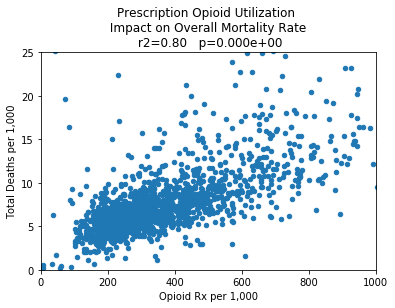

In [7]:
# Create plot of Opioid use and Mortality rates
combo8_df.plot(x='Opioid Rx per 1,000', y='Total Deaths per 1,000', kind='scatter', xlim=(0,1000),ylim=(0,25),
               title=f'Prescription Opioid Utilization \n Impact on Overall Mortality Rate \n r2={opmort_coeff}   p={opmort_pval}')

# Save the Figure
plt.savefig(f"Images/Opioid Use and Mortality Rates.png", bbox_inches='tight')

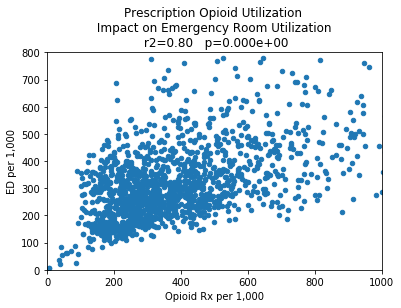

In [8]:
# Create plot of Opioid use and ED utilization
combo8_df.plot(x='Opioid Rx per 1,000', y='ED per 1,000', kind='scatter', xlim=(0,1000), ylim=(0,800),
               title=f'Prescription Opioid Utilization \n Impact on Emergency Room Utilization \n r2={oped_coeff}   p={oped_pval}')

# Save the Figure
plt.savefig(f"Images/Opioid Use and ED utilization.png", bbox_inches='tight')

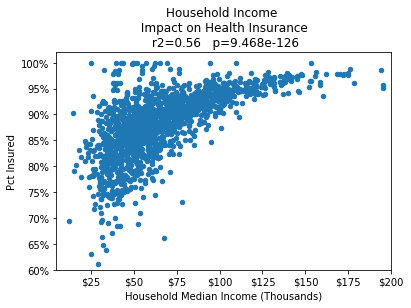

In [9]:
# convert Household Median Income to thousands for plot
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000

# Create plot of Median Income and Pct Insured
ax=combo8_df.plot(x='Household Median Income (Thousands)', y='Pct Insured', kind='scatter', xlim=(5,200), ylim=(60,102),
               title=f'Household Income \n Impact on Health Insurance \n r2={incins_coeff}   p={incins_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%'))

# Save the Figure
plt.savefig(f"Images/Median Income and Pct Insured.png", bbox_inches='tight')

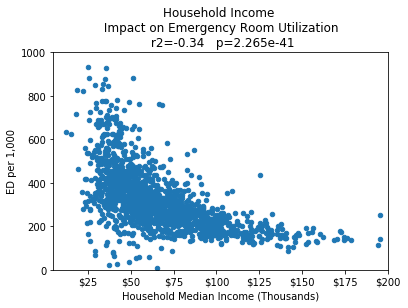

In [10]:
# convert Household Median Income to thousands for plot
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000

# Create plot of Median Income and ED utilization
ax=combo8_df.plot(x='Household Median Income (Thousands)', y='ED per 1,000', kind='scatter', xlim=(5,200), ylim=(0,1000),
               title=f'Household Income \n Impact on Emergency Room Utilization \n r2={inced_coeff}   p={inced_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Save the Figure
plt.savefig(f"Images/Median Income and ED utilization.png", bbox_inches='tight')

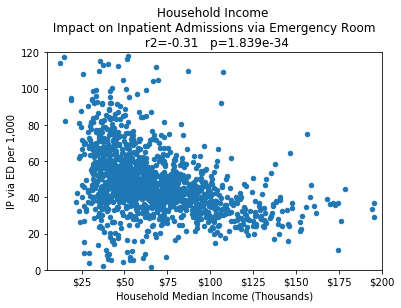

In [11]:
# Create plot of Median Income and Inpatient via ED
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000
ax = combo8_df.plot(x='Household Median Income (Thousands)', y='IP via ED per 1,000', kind='scatter', xlim=(5,200), ylim=(0,120), 
                    title=f'Household Income \n Impact on Inpatient Admissions via Emergency Room \n r2={inciped_coeff}   p={inciped_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Save the Figure
plt.savefig(f"Images/Median Income and Inpatient via ED.png", bbox_inches='tight')

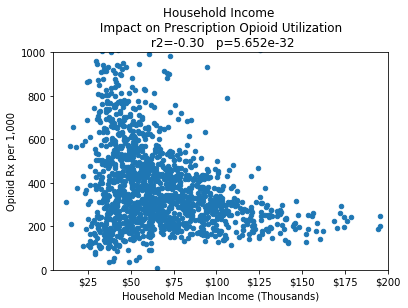

In [12]:
# convert Household Median Income to thousands for plot
combo8_df['Household Median Income (Thousands)'] = combo8_df['Household Median Income']/1000

# Create plot of Median Income and ED utilization
ax=combo8_df.plot(x='Household Median Income (Thousands)', y='Opioid Rx per 1,000', kind='scatter', xlim=(5,200), ylim=(0,1000),
               title=f'Household Income \n Impact on Prescription Opioid Utilization \n r2={incop_coeff}   p={incop_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Save the Figure
plt.savefig(f"Images/Median Income and Opioid utilization.png", bbox_inches='tight')

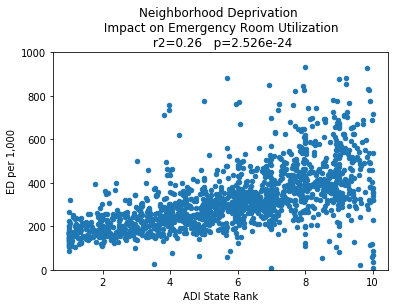

In [13]:
# Create plot of ADI and ED utilization
ax=combo8_df.plot(x='ADI State Rank', y='ED per 1,000', kind='scatter', ylim=(0,1000),
               title=f'Neighborhood Deprivation \n Impact on Emergency Room Utilization \n r2={adied_coeff}   p={adied_pval}')

# Save the Figure
plt.savefig(f"Images/ADI and ED utilization.png", bbox_inches='tight')

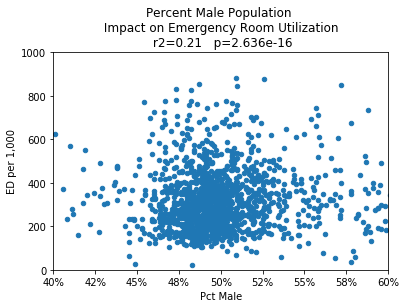

In [14]:
# Create plot of ADI and ED utilization
ax=combo8_df.plot(x='Pct Male', y='ED per 1,000', kind='scatter', xlim=(40,60), ylim=(0,1000),
               title=f'Percent Male Population \n Impact on Emergency Room Utilization \n r2={mled_coeff}   p={mled_pval}')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%'))

# Save the Figure
plt.savefig(f"Images/Pct Male and ED utilization.png", bbox_inches='tight')

###  Create Heat Map of High Opioid Use Areas and Cannabis Retail Locations

In [16]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [18]:
#Add CA Licensed Cannabis Retailer location data, including variable marker size based on number of retailers per city
bcc_ret_df = pd.read_csv("Resources/BCC_Licensed_Retailers.csv")
bcc_ret_gr = bcc_ret_df.groupby(['City','Lat','Lng']).count().reset_index()

def bcc_cats(row):
    if row['Business Name'] <= 5:
        return '5'
    elif row['Business Name'] <=10:
        return '10'
    elif row['Business Name'] <=20:
        return '20'
    elif row['Business Name'] <=30:
        return '30'
    elif row['Business Name'] <=40:
        return '40'
    elif row['Business Name'] >=40:
        return '50'
    else:
        return '60'

bcc_ret_gr['Loc_Cnt_Cat'] = bcc_ret_gr.apply(bcc_cats, axis=1)
bcc_ret_gr['Loc_Cnt_Cat'].unique()

array(['5', '20', '10', '50', '30', '40'], dtype=object)

In [23]:
# Zip 'Lat' and 'Lng' locations 
Zips = combo8_df[['Lat','Lng']].astype(float)
Opioid_Util = combo8_df['Opioid Rx per 1,000']

# Create variables for only zip with >500 Opioid Rx per 1,000 Pop
high_opioid_zips_df = combo8_df[combo8_df['Opioid Rx per 1,000']>=500]
Hi_Op_Zips = high_opioid_zips_df[["Lat", "Lng"]].astype(float)
Hi_Op_Util = high_opioid_zips_df['Opioid Rx per 1,000']

# Create variables for only zip with >500 ED Visits per 1,000 Pop
high_ed_zips_df = combo8_df[combo8_df['ED per 1,000']>=400]
Hi_ED_Zips = high_ed_zips_df[["Lat", "Lng"]].astype(float)
Hi_ED_Util = high_ed_zips_df['ED per 1,000']

# Bureau of Cannabis Control licensed retailers by city
bcc_ret_5 = bcc_ret_gr[bcc_ret_gr['Loc_Cnt_Cat']=='5']
bcc_ret_10 = bcc_ret_gr[bcc_ret_gr['Loc_Cnt_Cat']=='10']
bcc_ret_20 = bcc_ret_gr[bcc_ret_gr['Loc_Cnt_Cat']=='20']
bcc_ret_30 = bcc_ret_gr[bcc_ret_gr['Loc_Cnt_Cat']=='30']
bcc_ret_40 = bcc_ret_gr[bcc_ret_gr['Loc_Cnt_Cat']=='40']
bcc_ret_50 = bcc_ret_gr[bcc_ret_gr['Loc_Cnt_Cat']=='50']

bcc_locs_5 = bcc_ret_5[['Lat','Lng']].astype(float)
bcc_locs_10 = bcc_ret_10[['Lat','Lng']].astype(float)
bcc_locs_20 = bcc_ret_20[['Lat','Lng']].astype(float)
bcc_locs_30 = bcc_ret_30[['Lat','Lng']].astype(float)
bcc_locs_40 = bcc_ret_40[['Lat','Lng']].astype(float)
bcc_locs_50 = bcc_ret_50[['Lat','Lng']].astype(float)

bcc_locs_50

,Lat,Lng
50,34.114,-118.4068


In [24]:
# Create a Opioid Rx Rate Heatmap layer
figure_layout = {
    'width': '500px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px'
}

fig = gmaps.figure(layout=figure_layout, zoom_level=5.5, center=(37,-119))

markers5 = gmaps.symbol_layer(bcc_locs_5,scale=1)
markers10 = gmaps.symbol_layer(bcc_locs_10,scale=2)
markers20 = gmaps.symbol_layer(bcc_locs_20,scale=3)
markers30 = gmaps.symbol_layer(bcc_locs_30,scale=4)
markers40 = gmaps.symbol_layer(bcc_locs_40,scale=5)
markers50 = gmaps.symbol_layer(bcc_locs_50,scale=6)

heat_layer = gmaps.heatmap_layer(Hi_Op_Zips, weights=Hi_Op_Util, dissipating=False, max_intensity=1000,
                                 point_radius = 0.15)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 1000
heat_layer.point_radius = 0.15

fig.add_layer(heat_layer)
fig.add_layer(markers5)
fig.add_layer(markers10)
fig.add_layer(markers20)
fig.add_layer(markers30)
fig.add_layer(markers40)
fig.add_layer(markers50)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', padding='1px', width='500px'))

In [25]:
# Create a ED Visit Rate Heatmap layer
figure_layout = {
    'width': '500px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px'
}

fig = gmaps.figure(layout=figure_layout, zoom_level=5.5, center=(37,-119))

markers5 = gmaps.symbol_layer(bcc_locs_5,scale=1)
markers10 = gmaps.symbol_layer(bcc_locs_10,scale=2)
markers20 = gmaps.symbol_layer(bcc_locs_20,scale=3)
markers30 = gmaps.symbol_layer(bcc_locs_30,scale=4)
markers40 = gmaps.symbol_layer(bcc_locs_40,scale=5)
markers50 = gmaps.symbol_layer(bcc_locs_50,scale=6)

heat_layer = gmaps.heatmap_layer(Hi_ED_Zips, weights=Hi_ED_Util, dissipating=False, max_intensity=1000,
                                 point_radius = 0.15)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 1000
heat_layer.point_radius = 0.15

fig.add_layer(heat_layer)
fig.add_layer(markers5)
fig.add_layer(markers10)
fig.add_layer(markers20)
fig.add_layer(markers30)
fig.add_layer(markers40)
fig.add_layer(markers50)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', padding='1px', width='500px'))